#**Bioinformatics Workshop**: identifying an unknown genetic sequence

In [ ]:
# Setup Biopython
!pip install biopython

     |████████████████████████████████| 2.3MB 5.5MB/s 


In [ ]:
import Bio

from Bio import SeqIO, SearchIO
from Bio.Seq import Seq

**FASTA file format:**

- FASTA files are used in bioinformatics to store nucleotide (DNA/RNA) and/or amino acid (protein) sequences.
- The nucleotides/amino acids are represented by single-letter codes, and the sequence name/info precedes the sequence. 

In [ ]:
input_file = "UnknownSequence.fasta"
# there will only be a single sequence in this fasta file

# SeqIO.parse() lets us loop over all the records in a file 
for record in SeqIO.parse(input_file, "fasta"):
  print(record.id)

Unknown_Sequence


In [ ]:
record = SeqIO.read(input_file, "fasta")
record.seq

Seq('ATGAAAAACCCAAAAAAGAAATCCGGAGGATTCCGGATTGTCAATATGCTAAAA...TAA', SingleLetterAlphabet())

In [ ]:
print("Sequence length (in base pairs): ", len(record))

Sequence length (in base pairs):  10272


In [ ]:
print("Vocabulary: ", list(set(record)))

Vocabulary:  ['C', 'G', 'A', 'T']


Question: Based on the characters/letters found in our sequence, what type of sequence are we dealing with?

**DNA?**

**RNA?**

**Protein or amino acid?**

We now know that the unknown sequence length is around ~10 Kb (kilobases) or ~10 000 base pairs. 

Question: Assuming the sequence represents the entire genome, and given the data below, what might we be dealing with?

**Human genome size:** Over 3 billion base pairs

**Pinkmottle woodwax (a type of fungus) genome size:** Around 27.4 million base pairs.

**E. Coli (a type of bacteria) genome size:** Over 4.6 million base pairs

**Virus genome size:** Can range from around 2000 - 1 million base pairs depending on the virus 





# Comparing with other genomes:

We will now use **BLAST** to **align the unknown sequence to other annotated sequences** in the **NCBI nt (nucleotide) database**, which contains genetic sequences from many different species from across the tree of life.

## What is BLAST?
- BLAST (Basic Local Alignment Search Tool) is an algorithm and program used in bioinformatics to compare biological sequence information.
- BLAST aligns these different sequences and finds regions of similarity between them.

## What is NCBI?
- NCBI (National Center for Biotechnology Information) is a series of biological databases and tools.

This step may take a couple minutes since we are doing an online search against many sequences.

In [ ]:
# calling the online version of BLAST, if it takes too long, use BLAST manually and download XML file of results
'''
result_handle = NCBIWWW.qblast("blastn", "nt", record.seq)
blast_qresult = SearchIO.read(result_handle, "blast-xml")
print(blast_qresult) 
'''

blast_qresult = SearchIO.read("blast.xml", "blast-xml")
print(blast_qresult)

Program: blastn (2.10.1+)
  Query: Unknown_Sequence (10272)
 Target: nt
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  gi|984874583|gb|KU501216.1|  Zika virus strain 103344 p...
            1      1  gi|984874585|gb|KU501217.1|  Zika virus strain 8375 pol...
            2      1  gi|1031621529|gb|KX262887.1|  Zika virus isolate 103451...
            3      1  gi|1168020093|gb|KY785418.1|  Zika virus isolate Zika v...
            4      1  gi|1041521204|gb|KX421195.1|  Zika virus isolate Nica1-...
            5      1  gi|1041521202|gb|KX421194.1|  Zika virus isolate Nica2-...
            6      1  gi|1162229511|gb|KY765326.1|  Zika virus strain ZIKV/Ho...
            7      1  gi|1103718119|gb|KX694534.2|  Zika virus strain ZIKV/Ho...
            8      1  gi|1162229509|gb|KY765325.1|  Zika virus strain ZIKV/Ho..

In [ ]:
# the sequence descriptions above are cut off, let's view them in full
[hit.description for hit in blast_qresult]

['Zika virus strain 103344 polyprotein gene, complete cds',
 'Zika virus strain 8375 polyprotein gene, complete cds',
 'Zika virus isolate 103451, complete genome',
 'Zika virus isolate Zika virus/H.sapiens-wt/HND/2016/HU-ME59-PLA polyprotein gene, complete cds',
 'Zika virus isolate Nica1-16 polyprotein gene, complete cds',
 'Zika virus isolate Nica2-16 polyprotein gene, complete cds',
 'Zika virus strain ZIKV/Homo sapiens/NIC/6188_13A1_SP/2016, complete genome',
 'Zika virus strain ZIKV/Homo sapiens/HND/R103451/2015, complete genome',
 'Zika virus strain ZIKV/Homo sapiens/NIC/5005_13A1/2016, complete genome',
 'Zika virus isolate mex48/Mexico/2016 polyprotein gene, complete cds']

Looks like we were dealing with the Zika virus! 

The Zika virus causes a disease called Zika, which is mostly spread via mosquito bites in more tropical areas like South America, the Carribean, and Southeast Asia. The virus typically causes mild illness lasting only a few days, but can cause serious birth defects if pregnant women are infected. There is currently no vaccine or medicine for Zika.


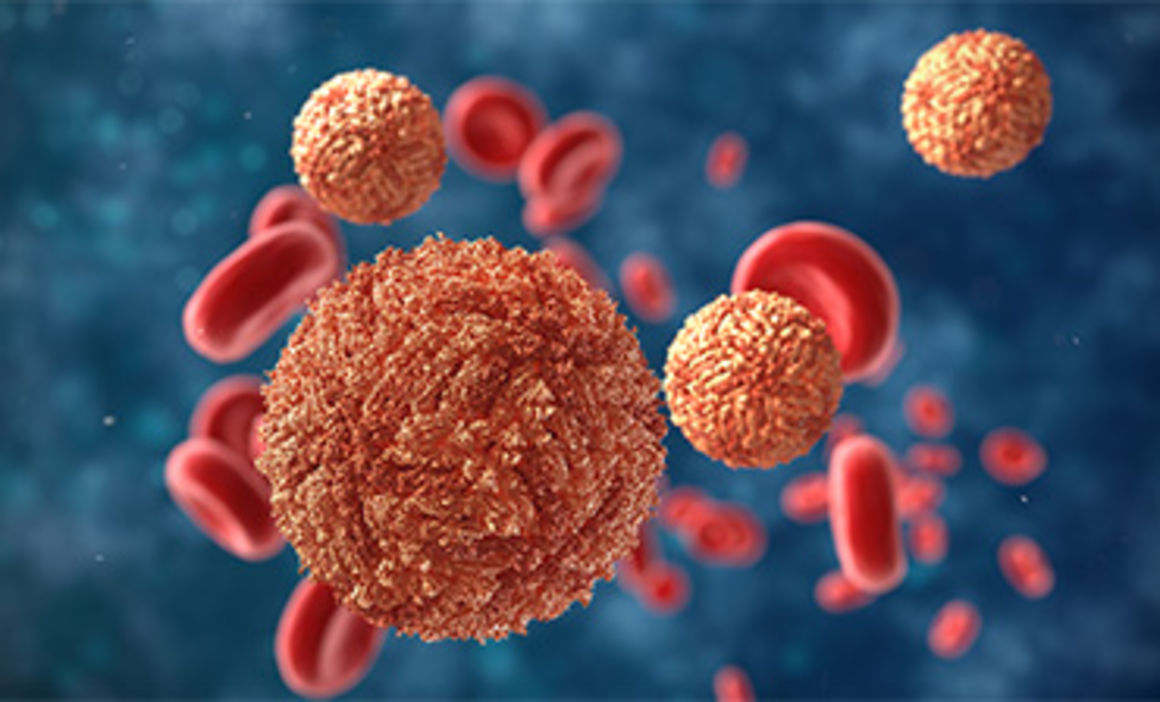

Let's now take a closer look at some of the hits (aka results) and look at their alignments with our query sequence.

In [ ]:
first_hit = blast_qresult[0]
first_hit.description 

'Zika virus strain 103344 polyprotein gene, complete cds'

In [ ]:
# HSP (High-scoring Segment Pair) is an alignment with no gaps that achieves one of the highest alignment scores in the search.
first_HSP = first_hit[0]
# the smaller the E-value (expect value), the better the match
print("E-value: ", first_HSP.evalue)
print("Alignment:\n ", first_HSP.aln)

E-value:  0.0
Alignment:
  DNAAlphabet() alignment with 2 rows and 10272 columns
ATGAAAAACCCAAAAAAGAAATCCGGAGGATTCCGGATTGTCAA...TAA Unknown_Sequence
ATGAAAAACCCAAAAAAGAAATCCGGAGGATTCCGGATTGTCAA...TAA gi|984874583|gb|KU501216.1|


The alignment above seems to be of high quality!